# Analysis of Tablets from Amazon 

#### Analyzing data of all tablets from amazon.com. Scraped using Scrapy
#### Goal, to analyze differences in products and compare to Amazons brand of tablets, Fire HD tablets. 

In [1]:
import pandas as pd 

#load csv file scraped from Amazon.com in master folder 
df = pd.read_csv("data.csv")
df.head()

,brand,description,num_reviews,price,rating,title
0,Dragon,",,[ Native and Latest Android OS ] The Max10 u...",816 ratings,$149.99,4.4 out of 5 stars,"Dragon Touch Max10 Tablet, Android 10.0 OS, Oc..."
1,Hoozo,",,【Latest Ver. Tablets】: Android 8.1 Go OS, 1....","2,099 ratings",$91.77,3.9 out of 5 stars,"Android Tablet 10 Inch, 5G WiFi Tablet, 16 GB ..."
2,vankyo,",,Faster and More responsive: Equipped with th...","1,711 ratings",$74.99,4.4 out of 5 stars,"VANKYO MatrixPad S7 7 inch Tablet, Android 9.0..."
3,Dragon,",,[Strong and Powerful Performance]: Do what y...","4,595 ratings",$119.99,4.4 out of 5 stars,"Dragon Touch Notepad K10 Tablet, 10 inch Andro..."
4,Amazon,A Certified Refurbished Fire 7 Tablet is refur...,"2,140 ratings",$59.99,4.4 out of 5 stars,"Certified Refurbished Fire 7 Tablet (7"" displa..."


- Using Scrapy I was able to scrape the following variables: Brand, Description, number of reviews, price, rating, and title
- Scrapy was able to scrape over 9000 entries!
- However we want to omit 'Renewed' and 'Refurbished' entries to prevent duplicates 

### Removal of refurbished and renewed devices

In [2]:
import warnings; warnings.simplefilter('ignore') #Ignore warning 
df =df[df['title'].str.contains('(Renewed)|refurbished|(Refurbished)|Refurbished')==False]
df =df[df['description'].str.contains('Refurbished|refurbished|Renewed')==False]
df =df[df['brand'].str.contains('Renewed')==False] #Remove devices under brand : Amazon Renewed 
df

,brand,description,num_reviews,price,rating,title
0,Dragon,",,[ Native and Latest Android OS ] The Max10 u...",816 ratings,$149.99,4.4 out of 5 stars,"Dragon Touch Max10 Tablet, Android 10.0 OS, Oc..."
1,Hoozo,",,【Latest Ver. Tablets】: Android 8.1 Go OS, 1....","2,099 ratings",$91.77,3.9 out of 5 stars,"Android Tablet 10 Inch, 5G WiFi Tablet, 16 GB ..."
2,vankyo,",,Faster and More responsive: Equipped with th...","1,711 ratings",$74.99,4.4 out of 5 stars,"VANKYO MatrixPad S7 7 inch Tablet, Android 9.0..."
3,Dragon,",,[Strong and Powerful Performance]: Do what y...","4,595 ratings",$119.99,4.4 out of 5 stars,"Dragon Touch Notepad K10 Tablet, 10 inch Andro..."
5,PRITOM,",,★[HIGH PERFORMANCE ANDROID TABLET ] - Pritom...",235 ratings,$89.99,4.0 out of 5 stars,Android Tablet Pritom 10 inch Android 9.0 OS T...
...,...,...,...,...,...,...
9571,Fusion5,",,10.1 INCH POWERFUL OCTA-CORE TABLET PC WITH ...",NaN,$159.95,NaN,"Fusion5 10.1"" 2in1 Google Certified Android La..."
9572,Samsung,",,Minimal bezel. Maximum view. Watch, stream a...","8,882 ratings",$206.68,4.7 out of 5 stars,SAMSUNG SM-T510NZDFXAR Galaxy Tab A 10.1 64 GB...
9573,Amazon,"8"" HD display, 2X the storage (32 or 64 GB of ...","30,108 ratings",$89.99,4.5 out of 5 stars,"All-new Fire HD 8 tablet, 8"" HD display, 32 GB..."
9574,Amazon,"10.1"" 1080p full HD display; 32 or 64 GB of in...","77,593 ratings",$149.99,4.6 out of 5 stars,"Fire HD 10 Tablet (10.1"" 1080p full HD display..."


In [3]:
#Inspect csv file to insure renewed and refurbished do not show up. Uncomment to test
#df.to_csv('dataclean.csv')

- Upon inspecting the csv file, all refurbished and renewed devices have been omitted! 
- Now we can analyze only orginal posts without having to worry about inflated values due to duplicates 

<br>

## Most Prevalent Tablet Brands on Amazon

In [4]:
brands_df = df['brand'].value_counts()
brands_df.head()

Nobrand      358
Dongdexiu    326
Microsoft    289
YUCHENG      209
AniaStore    177
Name: brand, dtype: int64

#### Interestingly the brands with the most products on Amazon are:
- No Brand
- Dongdexiu
- Microsoft
- YUCHENG
- AniaStore 


## Most Popular Tablets by number of ratings 

#### We can inspect from the number of ratings that the most popular tablet brands are 
- Apple
- Samsung
- Amazon
- Lenovo
- Microsoft
- Asus

#### These brands were the only ones to have devices which showed over 1,000 reviews in the number of reviews column
#### A quick google search shows this to be true. 

## Analyzing the Overall rating Scores of Tablets to Amazons Fire HD. 

In [5]:
#Count total values of ratings, group similar ones. Remove .head() to see full
rating_df = df['rating'].value_counts()
rating_df.head()

5.0 out of 5 stars    163
4.0 out of 5 stars    139
3.5 out of 5 stars     98
4.1 out of 5 stars     94
4.5 out of 5 stars     94
Name: rating, dtype: int64

In [6]:
#Lets look at a general Picture of what rating tablets on amazon tend to get.
#We will remove the decial value and group all ratings together by a single integer (1-5)
df['first'] = df['rating'].str.split('.').str[0]

rating_group_df = df['first'].value_counts().sort_index()
rating_group_df

1     58
2    136
3    728
4    730
5    163
Name: first, dtype: int64

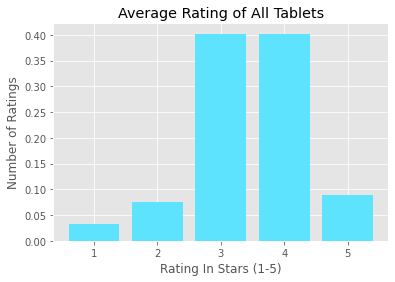

In [7]:
#Now lets create a bar chart 
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

summarised_results = rating_group_df
plt.bar(summarised_results.keys(), summarised_results.values/ summarised_results.sum(), color="#5ee3ff")


plt.xlabel("Rating In Stars (1-5)")
plt.ylabel("Number of Ratings")
plt.title("Average Rating of All Tablets")
plt.savefig("tmp/All_Tablets_Ratings.svg")
plt.show()

- As you can see from the bar chart most tablets have a fairly good Rating between 3-4+ stars 
- Roughly 40% for both 3 star and 4 star. And ~ 9% for 5 star. 
- From this we can infer that overall most customers are satisfied with their tablet purchase from Amazon (89% have 3-star rating or higher)

### Now how does Amazons Tablets Compare? 

In [8]:
#Lets first sort the dataframe to only list items with the title containing "Fire", the name of Amazons tablet
#Search title for Fire 
fire_df=df[df['title'].str.contains("Fire")]
fire_df.head()


,brand,description,num_reviews,price,rating,title,first
13,Amazon,Save up to $99 on a full-featured Fire HD 10 t...,"12,609 ratings",$199.99,4.7 out of 5 stars,Fire HD 10 Kids Edition Tablet – 10.1” 1080p f...,4
15,Amazon,Save up to $94.98 on a full-featured Fire HD 8...,"17,612 ratings",$139.99,4.7 out of 5 stars,"All-new Fire HD 8 Kids Edition tablet, 8"" HD d...",4
27,Amazon,Contains two Fire 7 Kids Edition tablets (16 G...,"1,592 ratings",$199.98,4.7 out of 5 stars,"Fire 7 Kids Edition Tablet 2-Pack, 16 GB, Blue...",4
46,Amazon,"8"" HD display; 16 or 32 GB of internal storage...","76,789 ratings",NaN,4.4 out of 5 stars,"Fire HD 8 Tablet (8"" HD Display, 32 GB) - Blac...",4
47,Amazon,Contains two Fire 7 Kids Edition tablets (16 G...,"1,592 ratings",$199.98,4.7 out of 5 stars,"Fire 7 Kids Edition Tablet 2-Pack, 16 GB, Blue...",4


In [9]:
rating_fire_df = fire_df['rating'].value_counts()
rating_fire_df.head()

4.7 out of 5 stars    14
4.6 out of 5 stars    13
5.0 out of 5 stars    10
4.5 out of 5 stars     9
4.0 out of 5 stars     6
Name: rating, dtype: int64

In [10]:
fire_df['first'] = fire_df['rating'].str.split('.').str[0]

fire_rating_group_df = fire_df['first'].value_counts().sort_index()
fire_rating_group_df

2     2
3     6
4    60
5    10
Name: first, dtype: int64

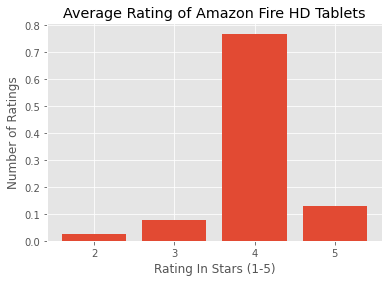

In [11]:
plt.style.use('ggplot')

summarised_results = fire_rating_group_df

plt.bar(summarised_results.keys(), summarised_results.values/ summarised_results.sum())


plt.xlabel("Rating In Stars (1-5)")
plt.ylabel("Number of Ratings")
plt.title("Average Rating of Amazon Fire HD Tablets")
plt.savefig("tmp/Fire_HD_Ratings.svg")
plt.show()

- As you can see overall most customers are overwhelmingly satisfed with Amazons brand of tablets. With No 1 star reviews and the vast majority of reviews being over 4 stars (Over 80%). Add to the fact that the Fire HD tablets are some of the most highly reviewed products on the Amazon market place its clear that most consumers opt for the Fire HD over other tablet manufactuerers 

# Word Cloud Analysis
## What words do Sellers use to market their Tablets? 
### Word Cloud of All Descriptions 
- Descriptions parsed into a dictionary by each line or bullet point via scrapy  
- Due to the high variance of the technical details page, the description was the best place to parse technical infomation 

In [12]:
from wordcloud import WordCloud

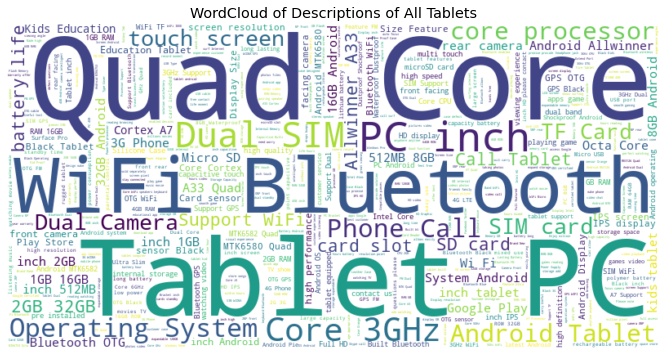

In [13]:
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
# generate word cloud
wc.generate(' '.join(df['description']))

#show

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Descriptions of All Tablets")
plt.savefig("tmp/WC_Descriptons_All.svg")
plt.show()

#### As We can see the most common features listed are: 
- Tablet PC
- WiFi
- Bluetooth
- Quad Core
- Dual SIM
- Android Tablet
- Core 1.3GHz
- 16GB / 32GB
- touch screen 

#### So we can say most tablets have at minium these features: WiFi, Bluetooth, A quad core processor, Running Android OS, Dual Sim capability, either 16GB or 32 GB internal memory, 1.3Ghz processing speed, and of course a touch screen. 

### Now what are the most common features implemented in the Fire HD Tablet? 

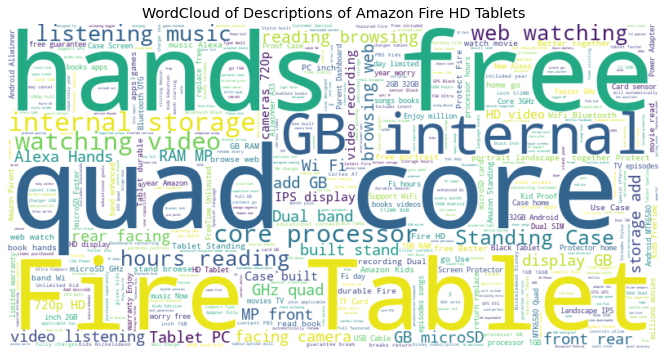

In [14]:
#fire_df is dataframe of only Fire HD products 

wc.generate(' '.join(fire_df['description']))

#show

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Descriptions of Amazon Fire HD Tablets")
plt.savefig("tmp/WC_Descriptons_FireHD.svg")
plt.show()

#### As We can see the most common features listed are: 
- Fire Tablet 
- watching video
- web watching 
- listening music
- Quad Core
- hands free
- hours reading 

#### We can infer from the word cloud that Amazon markets its tablets more towards people looking to do light tasks such as reading, web browsing, and watching videos on their tablet. 

# Conclusion:
### Amazon dominates the market on basic tablets for simple every day tasks such as watching videos, reading articles, web browsing, and video conferencing. They have the highest rated product having primarily 4-5 star reviews and the highest number of reviews of any other tablet on the Amazon marketplace. Their product is easily affordable compared to other brands such as the Microsoft Surface or Apple iPad, and their tablets regularly come on sale or include deals. Some of them even come built in with the voice assistant Alexa. Overall the Amazon Fire HD tablet is one of the most reliable 10-inch tablet you can buy for the money, with solid performance, good battery life, and a sharp display you cant go wrong. 